In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [68]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Importing the Dataset :

In [3]:
dl=pd.read_csv("loan_status.csv")

In [4]:
dl

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# About the important columns :

1. Gender  : tells whether the loan is taken by a male or female.

2. Married : tells if the person is married or not.

3. Dependents : this column tells how many dependents are there in the family for a person.for eg, 0 means no dependent and 3+ means more than three dependents.

4. Education : tells whether the person is graduated or not.

5. Self employed : tells whether the person is running his own business or working somewhere else.

6. Applicant Income : tells the income of the person in thousands of dollars.

7. Coapplicant Income : means the income of the applicant's spouse.

8. Loan Amount : tells the total amount for loan to the applicant in thousands of dollars.

9. Loan amount term : is the duration for which the applicant is applying for the loan.

10. Credit History : it means the credit score . for eg, if credit is 0 it means the applicant has not settled previous loan. and if it is 1 it means they have settled last loan properly.

11. Property Area : the type of area in which the applicant is having his or her property. for eg , Urban , Rural, Semi-Urban.

12. Loan Status : It means whether the loan applied by the applicant is approved or not . Y means approved and N means not approved.

# Sample Data :

In [5]:
dl.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
dl.shape

(614, 13)

There are total 614 rows and 13 columns in this dataset.

# Checking the dtypes :

In [7]:
dl.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

The columns LoanId, Gender, Married, dependents, education, Self employed, Loan status, and property area are categorical while the columns like applicant income, loan amount, loan amount term, credit history are continuous in nature.

# Exploring the data statistically for numerical columns :

In [8]:
dl.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


From the above , we can observe some statistical information about the columns like mean which is highest for Copplicant Income and lowest for Credit history column . Credit History has maximum values for 1 which means mostly the applicants have good credit history . Maximum loan amount applied is 700 thousand dollars and minimum amount for this is 9 thousand dollars. Similarly for other columns , we can notice the statistics.

By percentiles, we mean that in case of Applicant Income , there are 25 percentile of the persons who have income less than 2877.5000000 and similarly for 50 % and 75% .

Since by the count category above, we can see that value counts are different. let's check how many missing values we have . 

# Checking the missing values :

In [9]:
dl.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Since we do not have that many of missing values, we will drop them . 

# Dropping the missing values from the dataset :

In [10]:
dl=dl.dropna()

In [11]:
#let's check
dl.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Converting the categorical values into numerical  :

In [14]:
dl.replace({'Loan_Status':{'N': 0, 'Y':1}},inplace=True)

In [15]:
#checking the loan_status column
dl.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


As we can see above, the column loan_status has been successfully converted.

In [17]:
# checking the dependents column
dl["Dependents"].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

In [18]:
dl=dl.replace(to_replace='3+',value=4)

In [19]:
dl["Dependents"].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

# Data Visualization and Analysis :

1. Analyzing the relationship between Education and Loan Status :

In [20]:
dl.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<AxesSubplot:xlabel='Education', ylabel='count'>

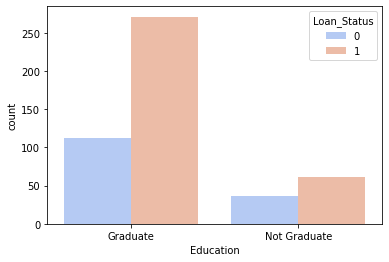

In [21]:
sns.countplot(dl["Education"],palette='coolwarm',hue="Loan_Status",data=dl)

By the above plot, we can see that there are more approvals for the loan if the person is graduated or educated and less approvals if the person is not graduated.

2. Now, let's see how one's marital status affects the loan approving tendency of the banks :

<AxesSubplot:xlabel='Married', ylabel='count'>

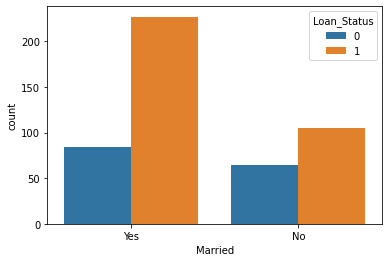

In [26]:
sns.countplot(dl["Married"],hue="Loan_Status",data=dl)

As we can observe from the above plot, if a person is married the loan approvals are more compared to the case of unmarried persons. Thus, we can conclude that the banks provide loans more to the one's who are unmarried since both the partners can pay-off the loan .

Now, let's see how Dependents column affects the loan status :

<AxesSubplot:xlabel='Dependents', ylabel='count'>

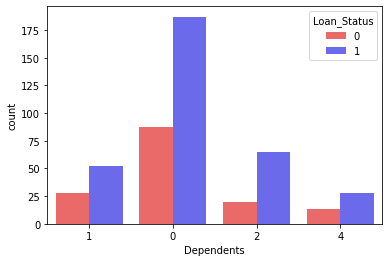

In [28]:
sns.countplot(dl["Dependents"],palette='seismic_r',hue="Loan_Status",data=dl)

As we can see from the above plot, in case no dependents of the person taking the loan, banks provide them loan more easily than to someone who are having dependents. 

Checking out the relationship between gender and Loan status columns :

<AxesSubplot:xlabel='Gender', ylabel='count'>

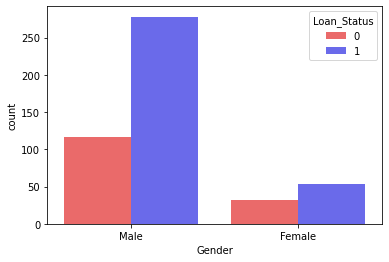

In [25]:
sns.countplot(dl["Gender"],palette='seismic_r',hue="Loan_Status",data=dl)

Males easily get approvals for the loan by the banks than females . 

How self employed column affects the loan status ?

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

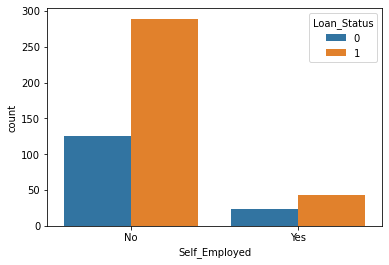

In [29]:
sns.countplot(dl["Self_Employed"],hue="Loan_Status",data=dl)

The applicants who are not self employed and are working in some organization as employees are getting more approvals by the banks for the loans , it can be due to the fact that businesses cannot confirm a permanent salary but jobs do.

Checking the Applicant's income :

<AxesSubplot:ylabel='Frequency'>

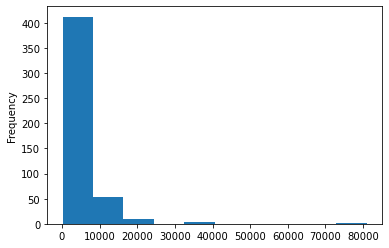

In [33]:
#using histogram
dl["ApplicantIncome"].plot(kind="hist")

From the above histogram, we can see that the applicants applying for the loan have their income ranging from 0-10,000 thousand dollars. Very few have the salary ranging from 20000-40000 thousand dollars.

# Now converting the remaining categorical values into numerical :

In [38]:
dl.replace({'Married':{'No': 0, 'Yes':1}, 'Gender':{'Male' : 0, 'Female' :1} , 'Self_Employed' :{'No':0 , 'Yes' :1}, 'Property_Area':{'Rural' :0, 'Urban' :1 , 'Semiurban' :2}, 'Education':{'Graduate':1,'Not Graduate' : 0}},inplace=True)

In [39]:
dl.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,LP001011,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


As, we can see that the above values are successfully converted.

# Now, we can split our dataset into train and test:

In [101]:
x=dl.drop(columns=['Loan_ID','Loan_Status'],axis=1)
y=dl['Loan_Status']

In [102]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,1
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,1
5,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,1,0,2900,0.0,71.0,360.0,1.0,0
610,0,1,4,1,0,4106,0.0,40.0,180.0,1.0,0
611,0,1,1,1,0,8072,240.0,253.0,360.0,1.0,1
612,0,1,2,1,0,7583,0.0,187.0,360.0,1.0,1


In [103]:
y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64

In [104]:
scaler=StandardScaler()

In [105]:
scaler.fit(x)

StandardScaler()

In [106]:
standardized_data=scaler.transform(x)

In [107]:
print(standardized_data)

[[-0.46719815  0.73716237  0.11235219 ...  0.27554157  0.41319694
  -1.34825769]
 [-0.46719815  0.73716237 -0.70475462 ...  0.27554157  0.41319694
  -0.13178459]
 [-0.46719815  0.73716237 -0.70475462 ...  0.27554157  0.41319694
  -0.13178459]
 ...
 [-0.46719815  0.73716237  0.11235219 ...  0.27554157  0.41319694
  -0.13178459]
 [-0.46719815  0.73716237  0.92945899 ...  0.27554157  0.41319694
  -0.13178459]
 [ 2.14041943 -1.35655324 -0.70475462 ...  0.27554157 -2.42015348
   1.08468851]]


In [108]:
x=standardized_data
y=y=dl['Loan_Status']

Train_test_split :

In [109]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)

In [110]:
x.shape

(480, 11)

In [111]:
y.shape

(480,)

In [112]:
x_train.shape

(432, 11)

In [113]:
y_train.shape

(432,)

# Applying logistics regression to the model :

In [132]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr = lr.fit(x_train, y_train)

# check the accuracy on the training set
print('Accuracy =', lr.score(x_train, y_train)*100,'%');

Accuracy = 80.78703703703704 %


In [133]:
x_test_prediction=lr.predict(x_test)

In [134]:
x_test_prediction

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0], dtype=int64)

In [135]:
from sklearn.metrics import accuracy_score

In [136]:
#now again we will compare as above.as our machine has not seen the test data.
testing_data_accuracy=accuracy_score(y_test,x_test_prediction)

In [137]:
testing_data_accuracy

0.8333333333333334

# Training the model using support vector machine model:

We are using this model since we have two labels ( Y, N) for the column 'Loan Status'

In [114]:
classifier=svm.SVC(kernel='linear')

In [115]:
classifier.fit(x_train, y_train)

SVC(kernel='linear')

# Model Evaluation :

In [116]:
x_train_prediction=classifier.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)

In [117]:
print("Accuracy on training data is :",training_data_accuracy)

Accuracy on training data is : 0.8055555555555556


let's evaluate our model for the testing data to see the accuracy:

In [118]:
x_test_prediction=classifier.predict(x_test)
training_data_accuracy=accuracy_score(x_test_prediction,y_test)

In [119]:
print("Accuracy on testing data is:",training_data_accuracy)

Accuracy on testing data is: 0.8333333333333334


Since the accuracy score are not varying so much , so model is working fine. We can take and save any of the above two models used . 

# Making a predictive model :

In [124]:
#taking any input data as per the features of our dataset and passing through the model to check if the model gives correct answers
input_data=(0,1,2,1,1,5417,4196,267.0,360.0,1.0,1)

In [125]:
#changing the input data to numpy array
input_data_as_numpy_array=np.asarray(input_data)

In [126]:
#reshaping the array as we are predicting for only one istance and our model is trained for 614 rows and 13 columns
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)


In [127]:
std_data=scaler.transform(input_data_reshaped)
print(std_data)

[[-0.46719815  0.73716237  0.92945899  0.50325312  2.50454133  0.00931924
   0.99997795  1.52024509  0.27554157  0.41319694 -0.13178459]]


In [128]:
#to make the prediction now
prediction=classifier.predict(std_data)

In [129]:
print(prediction)

[1]


In [ ]:
So, as we can see the dataset also, the value we got is correct, which proved that our model is working correct.

# Saving the final Model:

In [131]:
import joblib
#save the model as the object file

joblib.dump(classifier, "svmfile.obj")
#load the model from the file and store in c -drive ( you can use any object name here i.e, instance name here of any particular file.
classifier_from_joblib=joblib.load("svmfile.obj")

#use the loaded model to make predictions

classifier_from_joblib.predict(x_test) 

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0], dtype=int64)

# Findings :

The following are the findings from the analysis made :

1. The loan status that was the label for the dataset and the predictive variable , depends upon no. of factors like Education, marital status, self employed or not, no. of dependents that an applicant has, an applicant's credit history , the property area owned by the applicant etc.

2. If applicant is educated , married , having no dependent, not self employed, and a good credit history , he is more capable of getting loan by the banks.

3.Banks wants quick repayment of the loans so they want their applicants to be married so that both the partners can repay the loan soon, having no dependents would make them concentrate only on the loan repayment and no other expenses, applicants having a permanent job are more promising to repay the loan as per the study.

4. Support Vector Machine model fits best to analyze such situations , since it is made for predicting label based scenarios like in this case there are two categories for the Loan Status column.

5. The model saved as final one can predict any set of the new values passed through it and gives true results to an extent.